In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 500
embedding_dim = 32
batch_size = 128
epochs = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
def plot_history(hst):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['acc']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_acc']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.show()

Epoch 1/20


C:\Users\4atty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - acc: 0.5080 - loss: 0.6941 - val_acc: 0.5716 - val_loss: 0.6816
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - acc: 0.6116 - loss: 0.6626 - val_acc: 0.7063 - val_loss: 0.6134
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - acc: 0.7321 - loss: 0.5617 - val_acc: 0.7804 - val_loss: 0.5153
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - acc: 0.7920 - loss: 0.4805 - val_acc: 0.7341 - val_loss: 0.5376
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - acc: 0.8186 - loss: 0.4346 - val_acc: 0.8456 - val_loss: 0.3816
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - acc: 0.8569 - loss: 0.3588 - val_acc: 0.8494 - val_loss: 0.3743
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - acc: 0.8804 - loss: 0.3095 - val_acc: 0.8657 - val_loss: 0.3302
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - acc: 0.8927 - loss: 0.2787 - val_acc: 0.8349 - val_loss: 0.3851
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 104

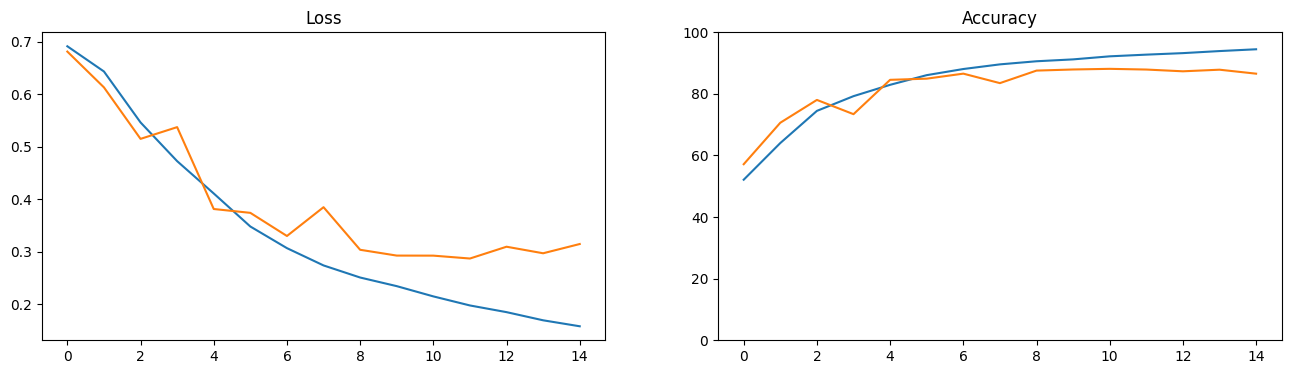

In [4]:
rnn_model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

rnn_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])
rnn_eval = rnn_model.evaluate(x_test, y_test, verbose=1)
print(f"RNN - Точність на тестовій вибірці: {rnn_eval[1]:.4f}")
plot_history(rnn_history)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - acc: 0.5526 - loss: 0.6912 - val_acc: 0.6745 - val_loss: 0.6296
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.7472 - loss: 0.5619 - val_acc: 0.8316 - val_loss: 0.4092
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.8531 - loss: 0.3657 - val_acc: 0.8574 - val_loss: 0.3364
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - acc: 0.8897 - loss: 0.2909 - val_acc: 0.8678 - val_loss: 0.3223
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - acc: 0.9100 - loss: 0.2434 - val_acc: 0.8765 - val_loss: 0.3069
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.9243 - loss: 0.2156 - val_acc: 0.8816 - val_loss: 0.2931
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - acc: 0.9332 - loss: 0.1945 - val_acc: 0.8801 - val_loss: 0.3002
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.9437 - loss: 0.1724 - val_acc: 0.8807 - val_loss: 0.2934
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - 

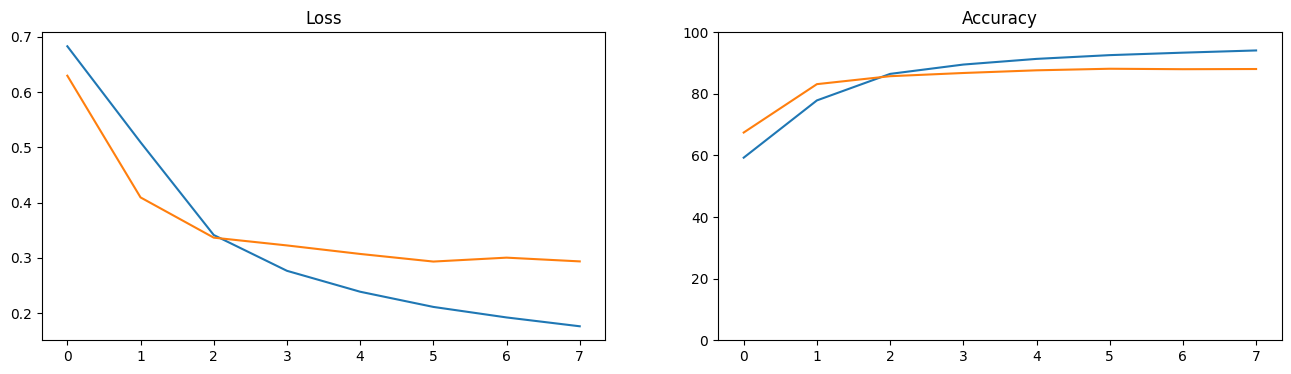

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
lstm_history = lstm_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])
lstm_eval = lstm_model.evaluate(x_test, y_test, verbose=1)
print(f"LSTM - Точність на тестовій вибірці: {lstm_eval[1]:.4f}")
plot_history(lstm_history)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - acc: 0.5193 - loss: 0.6903 - val_acc: 0.6900 - val_loss: 0.6521
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - acc: 0.7583 - loss: 0.5779 - val_acc: 0.8159 - val_loss: 0.4293
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - acc: 0.8551 - loss: 0.3714 - val_acc: 0.8534 - val_loss: 0.3523
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - acc: 0.8830 - loss: 0.3053 - val_acc: 0.8673 - val_loss: 0.3178
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - acc: 0.9012 - loss: 0.2602 - val_acc: 0.8730 - val_loss: 0.3024
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - acc: 0.9167 - loss: 0.2321 - val_acc: 0.8758 - val_loss: 0.3024
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - acc: 0.9271 - loss: 0.2035 - val_acc: 0.8810 - val_loss: 0.2915
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - acc: 0.9344 - loss: 0.1895 - val_acc: 0.8762 - val_loss: 0.3128
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 

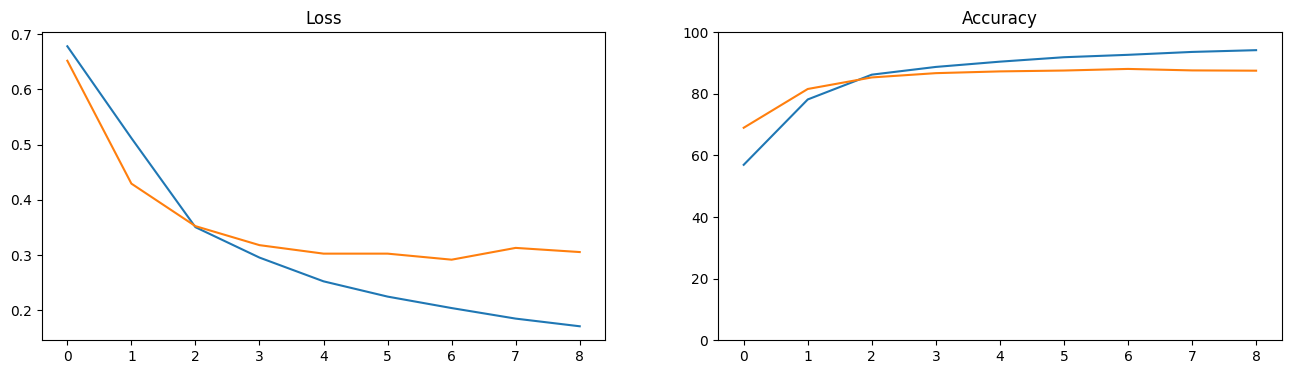

In [ ]:
brnn_model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

brnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
brnn_history = brnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])
brnn_eval = brnn_model.evaluate(x_test, y_test, verbose=1)
print(f"BRNN - Точність на тестовій вибірці: {brnn_eval[1]:.4f}")
plot_history(brnn_history)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 125s 632ms/step - acc: 0.4996 - loss: 0.6931 - val_acc: 0.5057 - val_loss: 0.6928
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 127s 647ms/step - acc: 0.5287 - loss: 0.6926 - val_acc: 0.5765 - val_loss: 0.6920
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 669ms/step - acc: 0.5657 - loss: 0.6913 - val_acc: 0.6294 - val_loss: 0.6861
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 732ms/step - acc: 0.6595 - loss: 0.6513 - val_acc: 0.7529 - val_loss: 0.5339
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 136s 696ms/step - acc: 0.7719 - loss: 0.4917 - val_acc: 0.8174 - val_loss: 0.4202
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 135s 689ms/step - acc: 0.8396 - loss: 0.3788 - val_acc: 0.8534 - val_loss: 0.3454
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 166s 842ms/step - acc: 0.8770 - loss: 0.3095 - val_acc: 0.8402 - val_loss: 0.3630
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 746ms/step - acc: 0.8870 - loss: 0.2861 - val_acc: 0.8655 - val_loss: 0.3254
Epoch 9/20
196/196 ━━━━━

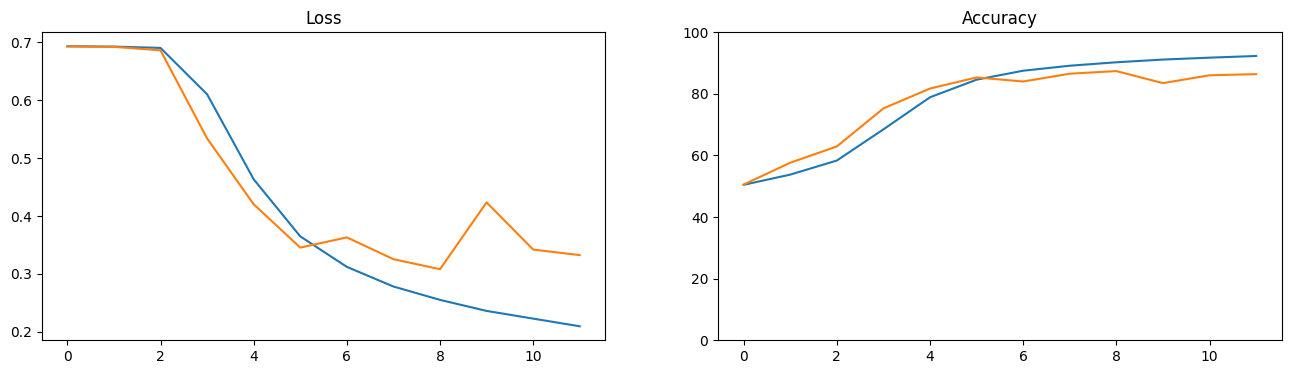

In [7]:
deep_lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

deep_lstm_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
deep_lstm_history = deep_lstm_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])
deep_lstm_eval = deep_lstm_model.evaluate(x_test, y_test, verbose=1)
print(f"Deep_LSTM- Точність на тестовій вибірці: {deep_lstm_eval[1]:.4f}")
plot_history(deep_lstm_history)